### Author: Frank Dattalo


# Federal Unsubsidized Loan Payment Calculation

This notebook is used as a Federal Unsub Loan Payment Calculator. Please note, these numbers are not 100% accurate because time value of money, inflation, and edge cases are not taken into account. This assumes that the value of the dollar will be the same value today as in the future. Futhermore, regarding edge cases, in certain instances the calculations may be off by one payment due to the method that the are calculated. Additionally, the calculations done here do not take into account leap years, which marginally change the interest rate factor of loans. Finally, no minimum amount for payment or potential late fees are accounted for when making calculations. Calculation methods, and interest rates can be found on [The Federal Student Aid Website](https://teststudentaid.ed.gov/testise/types/loans/interest-rates).

### Paramenters

|Parameter|Description|
|---------|-----------|
|LOAN_PRESENT_VALUE|Represents the present monetary value of loans.|
|LOAN_PRINCIPLE_VALUE|Represents the total principle value of loans (loan amount without any intrest).|
|LOAN_INTEREST_RATE|Represents the fixed interest rate of the loans as presented on the [The Federal Student Aid Website](https://teststudentaid.ed.gov/testise/types/loans/interest-rates).|
|DAYS_PER_PAYMENT|Represents the amount of time between payments.|
|AMOUNT_PER_PAYMENT|Represents the monetary amount, in dollars, per payment.|

In [1]:
LOAN_PRESENT_VALUE = 55000 #edit this
LOAN_PRINCIPLE_VALUE = 50000 #edit this
LOAN_INTEREST_RATE = .0429

DAYS_PER_PAYMENT = 15 #edit this
AMOUNT_PER_PAYMENT = 250 #edit this

### Code Used For Calculations

The following code is used for the calculations.


        Present Value:                    55000
        Principle:                        50000
        Days Per Payment:                 15
        Interest Rate:                    0.0429
        Amount Per Payment:               250
        Days Required to Pay Off Loans:   4020
        Months Required to Pay Off Loans: 134.0
        Years Required to Pay Off Loans:  11.166666666666666
        Number of payments required:      268
        Near cumulative value payed:      66812.2
        


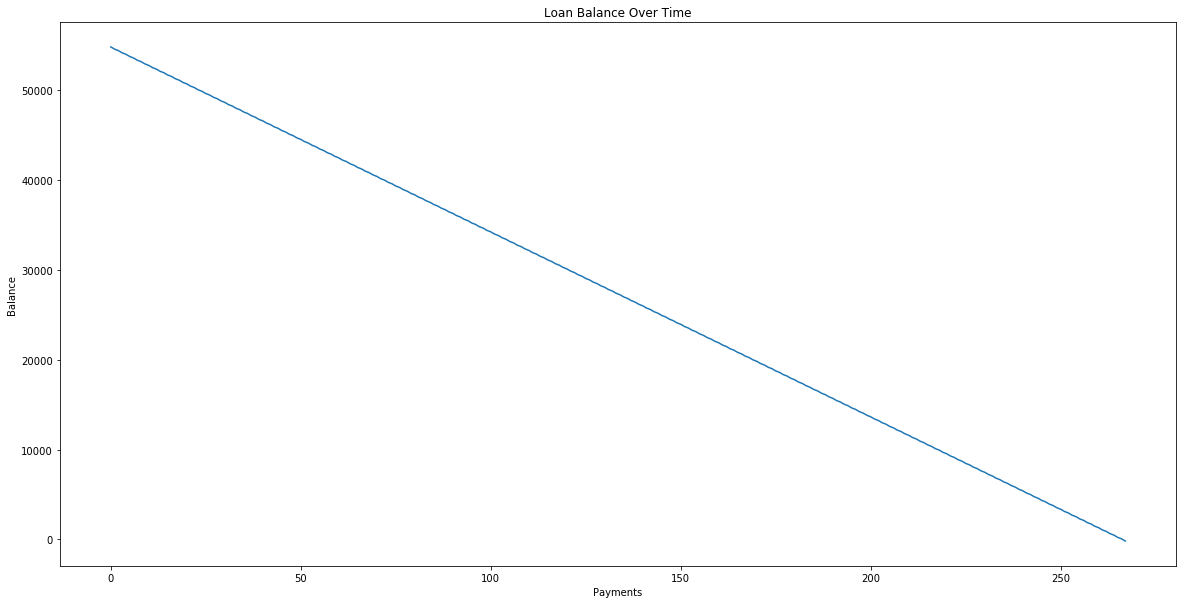

In [2]:
import matplotlib.pyplot as plt
import math

def interest_rate_factor(interest_rate, days_in_year):
    return interest_rate / days_in_year

def interest_formula(outstanding_principle_balance, days_since_last_payment, interest_rate_factor):
    return outstanding_principle_balance * days_since_last_payment * interest_rate_factor

def forcast_payments(balance, principle_balance, days_per_payment, interest_rate, payment_value):
    balances = []
    
    ir_factor = interest_rate_factor(interest_rate, 365)
    
    days_since_last_accrual = 30
    
    while balance > 0:
        
        prev_balance = balance
        
        if balance < principle_balance:
            princple_balance = balance
    
        if days_since_last_accrual >= 30:
            balance += interest_formula(principle_balance, days_per_payment, ir_factor)
            
            days_since_last_accrual -= 30
        
        days_since_last_accrual += days_per_payment
        
        balance -= payment_value
        
        balances.append(balance)
        
        if prev_balance < balance:
            return("Payment value or days per payment is too low, " + 
                            "interest will accrue faster than payment")
        
    return balances

def payment_info(pv, principle, days_per_payment, interest_rate, payment_amount):
    balances = forcast_payments(pv, principle, days_per_payment, interest_rate, payment_amount)
    
    if type(balances) is str:
        return balances
        
    payments = range(len(balances))
    
    days = len(payments) * days_per_payment
    
    months = days / 30
    
    years = months / 12
    
    if len(balances) > 0:
        ncv = math.ceil(100 * (len(payments) * payment_amount + balances[-1])) / 100
    else:
        ncv = 0
    
    print("""
        Present Value:                    {}
        Principle:                        {}
        Days Per Payment:                 {}
        Interest Rate:                    {}
        Amount Per Payment:               {}
        Days Required to Pay Off Loans:   {}
        Months Required to Pay Off Loans: {}
        Years Required to Pay Off Loans:  {}
        Number of payments required:      {}
        Near cumulative value payed:      {}
        """.format(pv, 
                   principle,
                   days_per_payment, 
                   interest_rate, 
                   payment_amount,
                   days,
                   months, 
                   years, 
                   len(payments),
                   ncv))
    
    plt.figure(figsize=(20, 10))
    plt.plot(payments, balances)
    plt.xlabel("Payments")
    plt.ylabel("Balance")
    plt.title("Loan Balance Over Time")
    plt.show()
    
payment_info(LOAN_PRESENT_VALUE, LOAN_PRINCIPLE_VALUE, DAYS_PER_PAYMENT, LOAN_INTEREST_RATE, AMOUNT_PER_PAYMENT)